In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Read the data

In [2]:
#Read the csv
df = pd.read_csv('../archive/2022/heart_2022_no_nans.csv')
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


### Check for duplicates and drop them | Check for nulls

In [3]:
int(df.duplicated().sum())

9

In [4]:
df = df.drop_duplicates()

In [5]:
df.isnull().sum()

State                        0
Sex                          0
GeneralHealth                0
PhysicalHealthDays           0
MentalHealthDays             0
LastCheckupTime              0
PhysicalActivities           0
SleepHours                   0
RemovedTeeth                 0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
RaceEthnicityCategory        0
AgeCategory                  0
HeightInMeters               0
WeightInKilograms            0
BMI     

### Print all non numeric columns to convert them (givin each category a numerical value)

In [6]:
non_numeric_columns = df.select_dtypes(exclude=['number']).columns

# Return values of non numerical columns 
def printUniqueValues(df,column):
    return f'Column: {column} Values: {df[column].unique()}'
def categorical_into_numerical_yes_no(df,column):
    return  df[column].apply(lambda val: 0 if( val == 'No') else 1 if (val == 'Yes') else  val)
for column in non_numeric_columns:
    row = printUniqueValues(df, column)
    print(row)

Column: State Values: ['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming' 'Guam' 'Puerto Rico'
 'Virgin Islands']
Column: Sex Values: ['Female' 'Male']
Column: GeneralHealth Values: ['Very good' 'Fair' 'Good' 'Excellent' 'Poor']
Column: LastCheckupTime Values: ['Within past year (anytime less than 12 months ago)'
 '5 or more years ago'
 'Within past 2 years (1 year but less than 2 years ago)'
 'Within past 5 years (2 years but less than 5 years

In [7]:
df.loc[:,'Sex_n'] = df['Sex'].apply(lambda val: 0 if( val == 'Male') else 1 ) # 0 if male 1 if female
df.loc[:,'LastCheckupTime_n'] = df['LastCheckupTime'].apply( lambda val: 0 if (val == 'Within past year (anytime less than 12 months ago)')
                                                            else 1 if (val == 'Within past 2 years (1 year but less than 2 years ago)') 
                                                            else 2 if (val == 'Within past 5 years (2 years but less than 5 years ago)')
                                                            else 3 if (val ==  '5 or more years ago')
                                                            else val)
df.loc[:,'RemovedTeeth_n'] = df['RemovedTeeth'].apply(lambda val: 0 if (val == 'None of them') 
                                                        else 1 if (val == '1 to 5')
                                                        else 2 if (val == '6 or more, but not all' )
                                                        else 3 if (val == 'All')
                                                        else val)
df.loc[:,'GeneralHealth_n'] = df['GeneralHealth'].apply(lambda val: 0 if val == 'Poor'
                                                          else 1 if val == 'Fair'  
                                                          else 2 if val == 'Good'
                                                          else 3 if val == 'Very good'
                                                          else 4 if val == 'Excellent'
                                                          else val) 
df.loc[:,'CovidPos_n'] = df['CovidPos'].apply(lambda val: 0 if (val == 'No')
                                                else 1 if (val == 'Tested positive using home test without a health professional')
                                                else 2 if (val == 'Yes')
                                                else val)
df.loc[:,'TetanusLast10Tdap_n'] = df['TetanusLast10Tdap'].apply(lambda val: 0 if (val == 'Yes, received Tdap') 
                                                                else 1 if (val == 'Yes, received tetanus shot, but not Tdap' )
                                                                else 2 if (val == 'Yes, received tetanus shot but not sure what type')
                                                                else 3 if (val == 'No, did not receive any tetanus shot in the past 10 years')
                                                                else val)
df.loc[:,'AgeCategory_n'] = df['AgeCategory'].apply(lambda val: 18 if val == 'Age 18 to 24'
                                                          else 25 if val == 'Age 25 to 29'  
                                                          else 30 if val == 'Age 30 to 34'
                                                          else 35 if val == 'Age 35 to 39'
                                                          else 40 if val == 'Age 40 to 44'
                                                          else 45 if val == 'Age 45 to 49'
                                                          else 50 if val == 'Age 50 to 54'
                                                          else 55 if val == 'Age 55 to 59'
                                                          else 60 if val == 'Age 60 to 64'
                                                          else 65 if val == 'Age 65 to 69'
                                                          else 70 if val == 'Age 70 to 74'
                                                          else 75 if val == 'Age 75 to 79'
                                                          else 80 if val == 'Age 80 or older'
                                                          else val) # Age into numerical category based on start age of range so 18 to 24 will be 18
df.loc[:,'HadDiabetes_n'] = df['HadDiabetes'].apply(lambda val: 0 if val == 'No'
                                                          else 1 if val == 'No, pre-diabetes or borderline diabetes'  
                                                          else 2 if val == 'Yes, but only during pregnancy (female)'
                                                          else 3 if val == 'Yes'
                                                          else val) # scale from 0 to 3 based on value
df.loc[:,'SmokerStatus_n'] = df['SmokerStatus'].apply(lambda val: 0 if val == 'Never smoked'
                                                          else 1 if val == 'Former smoker' 
                                                          else 2 if val == 'Current smoker - now smokes some days'
                                                          else 3 if val == 'Current smoker - now smokes every day'
                                                          else val) # scale from 0 to 4 based on value
df.loc[:,'ECigaretteUsage_n'] = df['ECigaretteUsage'].apply(lambda val: 0 if val == 'Never used e-cigarettes in my entire life'
                                                          else 1 if val == 'Not at all (right now)' 
                                                          else 2 if val == 'Use them some days'
                                                          else 3 if val == 'Use them every day'
                                                          else val) # scale from 0 to 4 based on value

for column in non_numeric_columns:
    unique_values = set(df[column].unique())  
    if unique_values.issubset({'Yes', 'No'}):  
        df[f'{column}_n'] = categorical_into_numerical_yes_no(df, column)
        df.drop(columns=[column], inplace=True)
df.drop(columns=['State','Sex','GeneralHealth','AgeCategory','HadDiabetes','SmokerStatus','ECigaretteUsage','RaceEthnicityCategory','LastCheckupTime'
                 ,'RemovedTeeth','CovidPos','TetanusLast10Tdap'], inplace=True)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246013 entries, 0 to 246021
Data columns (total 38 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   PhysicalHealthDays           246013 non-null  float64
 1   MentalHealthDays             246013 non-null  float64
 2   SleepHours                   246013 non-null  float64
 3   HeightInMeters               246013 non-null  float64
 4   WeightInKilograms            246013 non-null  float64
 5   BMI                          246013 non-null  float64
 6   Sex_n                        246013 non-null  int64  
 7   LastCheckupTime_n            246013 non-null  int64  
 8   RemovedTeeth_n               246013 non-null  int64  
 9   GeneralHealth_n              246013 non-null  int64  
 10  CovidPos_n                   246013 non-null  int64  
 11  TetanusLast10Tdap_n          246013 non-null  int64  
 12  AgeCategory_n                246013 non-null  int64  
 13  HadD

In [9]:
df

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI,Sex_n,LastCheckupTime_n,RemovedTeeth_n,GeneralHealth_n,...,DifficultyConcentrating_n,DifficultyWalking_n,DifficultyDressingBathing_n,DifficultyErrands_n,ChestScan_n,AlcoholDrinkers_n,HIVTesting_n,FluVaxLast12_n,PneumoVaxEver_n,HighRiskLastYear_n
0,4.0,0.0,9.0,1.60,71.67,27.99,1,0,0,3,...,0,0,0,0,0,0,0,1,1,0
1,0.0,0.0,6.0,1.78,95.25,30.13,0,0,0,3,...,0,0,0,0,0,0,0,1,1,0
2,0.0,0.0,8.0,1.85,108.86,31.66,0,0,2,3,...,0,1,0,0,1,1,0,0,1,0
3,5.0,0.0,9.0,1.70,90.72,31.32,1,0,0,1,...,0,1,0,0,0,0,0,1,1,0
4,3.0,15.0,5.0,1.55,79.38,33.07,1,0,1,2,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246017,0.0,0.0,6.0,1.78,102.06,32.28,0,1,0,3,...,0,0,0,0,0,1,0,0,0,0
246018,0.0,7.0,7.0,1.93,90.72,24.34,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
246019,0.0,15.0,7.0,1.68,83.91,29.86,0,0,1,2,...,0,0,0,0,0,1,1,1,1,0
246020,2.0,2.0,7.0,1.70,83.01,28.66,1,0,0,4,...,0,0,0,0,0,0,1,1,0,0


### Take a look at the distribution

In [10]:
print('Distribution of HadHeartAttack')
print('Normalized: ',df['HadHeartAttack_n'].value_counts(normalize=True))
print('Actual: ',df['HadHeartAttack_n'].value_counts())

Distribution of HadHeartAttack
Normalized:  HadHeartAttack_n
0    0.945389
1    0.054611
Name: proportion, dtype: float64
Actual:  HadHeartAttack_n
0    232578
1     13435
Name: count, dtype: int64


### Helper methods to split the dataset, balance the data set or balnce it by provided distribution

In [23]:
def split_dataset(df, target_column, test_size=0.2, random_state=42):
    X = df.drop(columns=[target_column])
    y = df[target_column]
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y
    )
    
    return X_train, X_test, y_train, y_test

def balance_dataset(df, target_column):

    df_heartAttack_0 = df[df[target_column] == 0 ] # no heart attack
    df_heartAttack_1 = df[df[target_column] == 1 ] # had heart attack

    # select smaller class as reference
    n_samples = min(len(df_heartAttack_0), len(df_heartAttack_1))

    # adapt sampling
    balanced_class_0 = df_heartAttack_0.sample(n=n_samples, random_state=42)
    balanced_class_1 = df_heartAttack_1.sample(n=n_samples, random_state=42)

    balanced_df = pd.concat([balanced_class_0,balanced_class_1])
    balanced_df = balanced_df.sample(frac=1, random_state=42) # shuffle 

    return balanced_df

def load_data_from_indicies(df,target_column='HadHeartAttack_n'):
    train_indices = pd.read_csv("TrainTestSets/train_indices.csv")['index'].tolist()
    test_indices = pd.read_csv("TrainTestSets/test_indices.csv")['index'].tolist()

    X_train = df.loc[train_indices].drop(columns=[target_column])
    y_train = df.loc[train_indices][target_column]
    X_test = df.loc[test_indices].drop(columns=[target_column])
    y_test = df.loc[test_indices][target_column]

    return X_train, X_test, y_train, y_test



#balnces dataset based on provided distribution
def split_dataset_x_distribution(df, target_column, x):

    # Separate classes
    df_heartAttack_0 = df[df[target_column] == 0]
    df_heartAttack_1 = df[df[target_column] == 1]
    
    # Determine the number of samples to take from each class
    if x == 1:
        # Equal distribution
        n_samples_class_0 = n_samples_class_1 = min(len(df_heartAttack_0), len(df_heartAttack_1))
    elif x < 1:
        # More class 1 than class 0
        n_samples_class_1 = len(df_heartAttack_1)
        n_samples_class_0 = int(len(df_heartAttack_1) * x)
    else:
        # More class 0 than class 1
        n_samples_class_0 = len(df_heartAttack_0)
        n_samples_class_1 = int(len(df_heartAttack_0) / x)
    
    # Sample the required number of instances from each class
    sampled_class_0 = df_heartAttack_0.sample(n=n_samples_class_0, random_state=42)
    sampled_class_1 = df_heartAttack_1.sample(n=n_samples_class_1, random_state=42)
    
    # Combine and shuffle the dataset
    balanced_df = pd.concat([sampled_class_0, sampled_class_1])
    balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)
    
    return balanced_df

### Load the data and show the distribution afterwards

In [19]:
df = balance_dataset(df,'HadHeartAttack_n')
X_train, X_test, y_train, y_test = split_dataset(df, target_column='HadHeartAttack_n')

print("Distribution Traing:")
print(y_train.value_counts(normalize=True),y_train.value_counts())
print("Distribution Test:")
print(y_test.value_counts(normalize=True),y_test.value_counts())

Distribution Traing:
HadHeartAttack_n
0    0.5
1    0.5
Name: proportion, dtype: float64 HadHeartAttack_n
0    10748
1    10748
Name: count, dtype: int64
Distribution Test:
HadHeartAttack_n
1    0.5
0    0.5
Name: proportion, dtype: float64 HadHeartAttack_n
1    2687
0    2687
Name: count, dtype: int64


Store current split int csv file to reuse the same data for all the followinf experiemnts

In [21]:
# Indizes in eine Liste umwandeln und speichern
X_train_indices = X_train.index.tolist()
X_test_indices = X_test.index.tolist()

# Als CSV speichern
pd.DataFrame({'index': X_train_indices}).to_csv("TrainTestSets/train_indices.csv", index=False)
pd.DataFrame({'index': X_test_indices}).to_csv("TrainTestSets/test_indices.csv", index=False)

In [ ]:
X_train2, X_test2, y_train2, y_test2 = load_data_from_indicies(df,target_column='HadHeartAttack_n')
#Check that they are equal
print(X_train.equals(X_train2)) 
print(y_train.equals(y_train2))  
print((X_train.index == X_train2.index).all())


True
True
True


In [25]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [84]:
def create_pipeline(X_train, model_type='logistic_regression'):
    numeric_columns = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numeric_columns) 
        ])
    
    if model_type == 'logistic_regression':
        model = LogisticRegression(random_state=42)
    elif model_type == 'random_forest':
        model = RandomForestClassifier(random_state=42, class_weight='balanced', n_estimators=200, max_depth=5)
    elif model_type == 'decision_tree':
        model = DecisionTreeClassifier(random_state=42, class_weight='balanced', max_depth=5)
    else:
        raise ValueError("Unbekanntes Modell")

    # Kombiniere Preprocessing + Modell in einer Pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    return pipeline

pipeline = create_pipeline(X_train, model_type='random_forest')
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.7905


In [85]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79      2687
           1       0.79      0.79      0.79      2687

    accuracy                           0.79      5374
   macro avg       0.79      0.79      0.79      5374
weighted avg       0.79      0.79      0.79      5374



### Lets take a look at the confusion matrix, the ROC curve and the F1 score curve

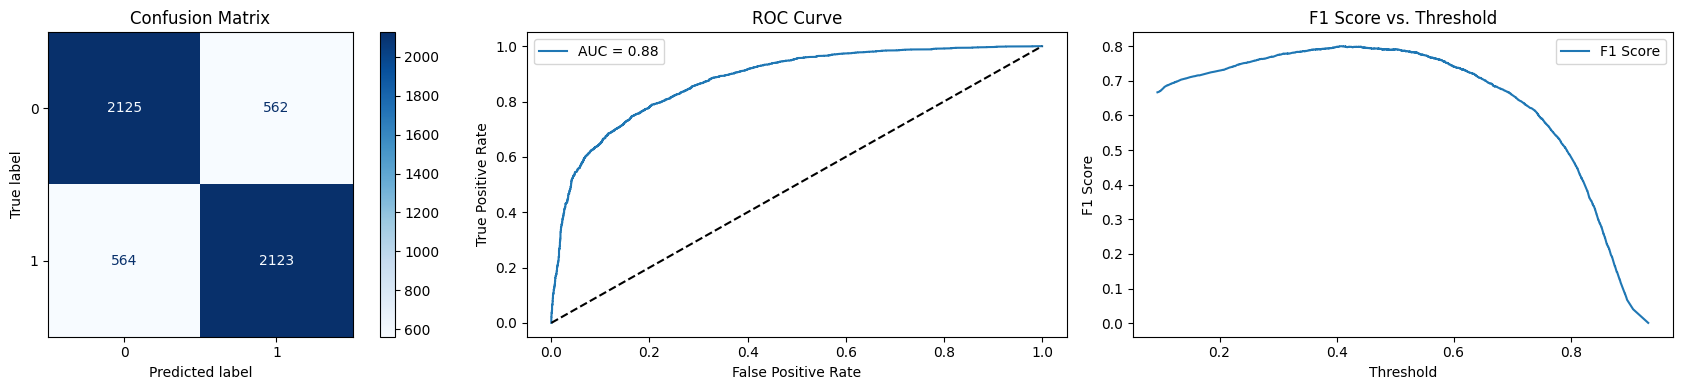

In [86]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score, f1_score

fig, axes = plt.subplots(1, 3, figsize=(18, 4)) 
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues', ax=axes[0]) 
axes[0].set_title("Confusion Matrix")
# ROC Curve 
y_prob = pipeline.predict_proba(X_test)[:, 1] 
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

axes[1].plot(fpr, tpr, label=f'AUC = {auc:.2f}')
axes[1].plot([0, 1], [0, 1], 'k--')  # Diagonale
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curve')
axes[1].legend(loc='best')

# F1-Score Curve
f1_scores = [f1_score(y_test, (y_prob >= threshold).astype(int)) for threshold in thresholds]

axes[2].plot(thresholds, f1_scores, label='F1 Score')
axes[2].set_xlabel('Threshold')
axes[2].set_ylabel('F1 Score')
axes[2].set_title('F1 Score vs. Threshold')
axes[2].legend(loc='best')

plt.tight_layout()
plt.show()

## Lets predict on only males or only females

In [94]:
#Splitting test dataset into male and females
X_test_male   = X_test[X_test['Sex_n'] == 0]
X_test_female = X_test[X_test['Sex_n'] == 1]
y_test_male   = y_test[X_test['Sex_n'] == 0]
y_test_female = y_test[X_test['Sex_n'] == 1]
#Predict on the different test sets
y_pred_male    = pipeline.predict(X_test_male)
y_pred_female = pipeline.predict(X_test_female)
#Check accuracy
accuracy_male = accuracy_score(y_test_male, y_pred_male)
accuracy_female = accuracy_score(y_test_female, y_pred_female)
print(f'Accuracy male: {accuracy_male:.4f}; Accuracy female: {accuracy_female:.4f}')
print('Classification report males')
print(classification_report(y_test_male, y_pred_male))
print('Classification report females')
print(classification_report(y_test_female, y_pred_female))

Accuracy male: 0.7908; Accuracy female: 0.7901
Classification report males
              precision    recall  f1-score   support

           0       0.75      0.76      0.76      1289
           1       0.82      0.81      0.82      1713

    accuracy                           0.79      3002
   macro avg       0.79      0.79      0.79      3002
weighted avg       0.79      0.79      0.79      3002

Classification report females
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1398
           1       0.74      0.75      0.75       974

    accuracy                           0.79      2372
   macro avg       0.78      0.78      0.78      2372
weighted avg       0.79      0.79      0.79      2372



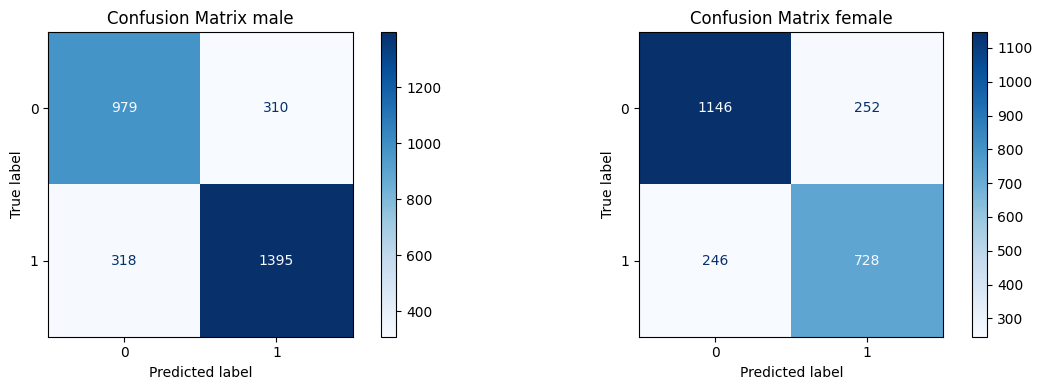

In [95]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4)) 
#confusion matrix male
cm_male = confusion_matrix(y_test_male, y_pred_male)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_male, display_labels=[0, 1])
disp.plot(cmap='Blues', ax=axes[0]) 
axes[0].set_title("Confusion Matrix male")
#confusion matrix females
cm_female = confusion_matrix(y_test_female, y_pred_female)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_female, display_labels=[0, 1])
disp.plot(cmap='Blues', ax=axes[1]) 
axes[1].set_title("Confusion Matrix female")
plt.tight_layout()
plt.show()

## Feature enginieering, see which have the most important and train with less features

In [51]:
feature_importances = pipeline.named_steps['classifier'].feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(importance_df.head(14)) # the first 14 features have a importance >= 0.01

                Feature  Importance
17          HadAngina_n    0.344339
12        AgeCategory_n    0.137754
31          ChestScan_n    0.130539
9       GeneralHealth_n    0.089254
8        RemovedTeeth_n    0.051473
28  DifficultyWalking_n    0.049509
18          HadStroke_n    0.047906
35      PneumoVaxEver_n    0.027598
13        HadDiabetes_n    0.021696
24       HadArthritis_n    0.019676
0    PhysicalHealthDays    0.016947
6                 Sex_n    0.015159
21            HadCOPD_n    0.010565
14       SmokerStatus_n    0.009584


In [57]:
top_features = importance_df['Feature'].head(14).tolist() # only features with a 
X_train_reduced = X_train[top_features]
X_test_reduced = X_test[top_features]

In [58]:
pipeline_reduced = create_pipeline(X_train_reduced, model_type='random_forest')
pipeline_reduced.fit(X_train_reduced, y_train)
y_pred_reduced = pipeline_reduced.predict(X_test_reduced)
accuracy2 = accuracy_score(y_test, y_pred_reduced)
print(f'Accuracy: {accuracy2:.4f}')
print(classification_report(y_test, y_pred_reduced))

Accuracy: 0.7890
              precision    recall  f1-score   support

           0       0.78      0.81      0.79      2687
           1       0.80      0.77      0.79      2687

    accuracy                           0.79      5374
   macro avg       0.79      0.79      0.79      5374
weighted avg       0.79      0.79      0.79      5374



## Sanity check

In [68]:
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.utils import shuffle

def randomized_sanity_check(runs, X_train, y_train, model_type):
    acc_list = []
    precision_class_0 = []
    precision_class_1 = []
    recall_class_0 = []
    recall_class_1 = []
    
    for i in range(runs):
        y_train_randomized = shuffle(y_train, random_state=42 + i)
        pipeline_randomized = create_pipeline(X_train, model_type=model_type)
        pipeline_randomized.fit(X_train, y_train_randomized)
        
        y_pred_randomized = pipeline_randomized.predict(X_test)
        
        acc_list.append(accuracy_score(y_test, y_pred_randomized))
        precisions = precision_score(y_test, y_pred_randomized, average=None, zero_division=0)
        recalls = recall_score(y_test, y_pred_randomized, average=None, zero_division=0)
        
        precision_class_0.append(precisions[0])
        precision_class_1.append(precisions[1])
        recall_class_0.append(recalls[0])
        recall_class_1.append(recalls[1])
    
    # Return all metrics
    return {
        "accuracy": acc_list,
        "precision_class_0": precision_class_0,
        "precision_class_1": precision_class_1,
        "recall_class_0": recall_class_0,
        "recall_class_1": recall_class_1
    }

# Execute the function
sanity_metrics = randomized_sanity_check(5, X_train, y_train, 'random_forest')

# Calculate and display mean metrics
mean_accuracy = np.mean(sanity_metrics['accuracy'])
mean_precision_class_0 = np.mean(sanity_metrics['precision_class_0'])
mean_precision_class_1 = np.mean(sanity_metrics['precision_class_1'])
mean_recall_class_0 = np.mean(sanity_metrics['recall_class_0'])
mean_recall_class_1 = np.mean(sanity_metrics['recall_class_1'])

print(f"Mean Accuracy: {mean_accuracy:.4f}")
print(f"Mean Precision (Class 0): {mean_precision_class_0:.4f}, Mean Precision (Class 1): {mean_precision_class_1:.4f}")
print(f"Mean Recall (Class 0): {mean_recall_class_0:.4f}, Mean Recall (Class 1): {mean_recall_class_1:.4f}")

Mean Accuracy: 0.4420
Mean Precision (Class 0): 0.4395, Mean Precision (Class 1): 0.4439
Mean Recall (Class 0): 0.4394, Mean Recall (Class 1): 0.4445


## Try out with neural network

In [69]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

In [70]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
model = Sequential([
    Input(shape=(X_train.shape[1],)),  
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.summary()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         4,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,185 (51.50 KB)

 Trainable params: 13,185 (51.50 KB)

 Non-trainable params: 0 (0.00 B)

In [71]:
history = model.fit(
    X_train,  
    y_train,  
    validation_data=(X_test, y_test),
    epochs=50,  
    batch_size=32,  
    callbacks=[early_stopping],
    verbose=1 
)

Epoch 1/50
672/672 ━━━━━━━━━━━━━━━━━━━━ 1s 837us/step - accuracy: 0.6315 - loss: 0.7539 - val_accuracy: 0.7464 - val_loss: 0.5268
Epoch 2/50
672/672 ━━━━━━━━━━━━━━━━━━━━ 0s 612us/step - accuracy: 0.7555 - loss: 0.5098 - val_accuracy: 0.7655 - val_loss: 0.4963
Epoch 3/50
672/672 ━━━━━━━━━━━━━━━━━━━━ 0s 612us/step - accuracy: 0.7749 - loss: 0.4790 - val_accuracy: 0.7741 - val_loss: 0.4839
Epoch 4/50
672/672 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step - accuracy: 0.7826 - loss: 0.4604 - val_accuracy: 0.7700 - val_loss: 0.4857
Epoch 5/50
672/672 ━━━━━━━━━━━━━━━━━━━━ 0s 683us/step - accuracy: 0.7923 - loss: 0.4494 - val_accuracy: 0.7918 - val_loss: 0.4525
Epoch 6/50
672/672 ━━━━━━━━━━━━━━━━━━━━ 0s 610us/step - accuracy: 0.7971 - loss: 0.4389 - val_accuracy: 0.7953 - val_loss: 0.4440
Epoch 7/50
672/672 ━━━━━━━━━━━━━━━━━━━━ 0s 619us/step - accuracy: 0.7974 - loss: 0.4325 - val_accuracy: 0.7957 - val_loss: 0.4399
Epoch 8/50
672/672 ━━━━━━━━━━━━━━━━━━━━ 0s 611us/step - accuracy: 0.8004 - loss: 0.4296 - 

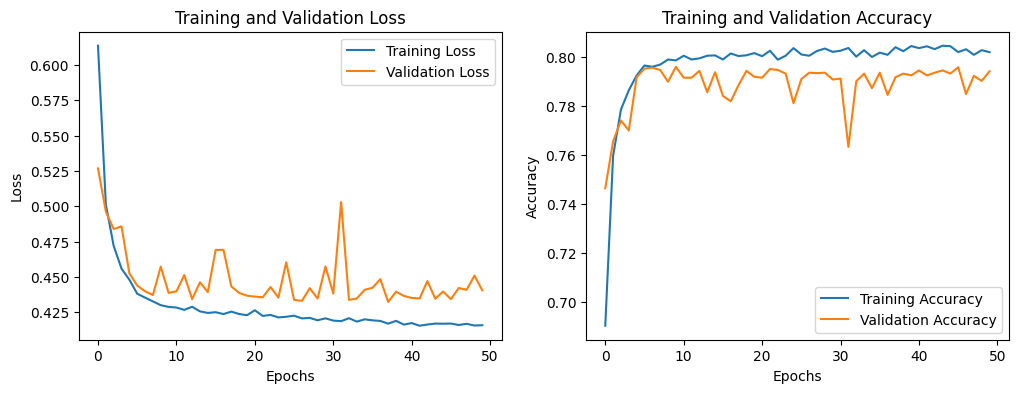

In [72]:
# Trainings- und Validierungsverlust
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1,2,2)
# Trainings- und Validierungsgenauigkeit
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step
Accuracy: 0.7949
Precision class 0: 0.8197, Precision class 1: 0.7737
Recall class 0: 0.7562, Recall class 1: 0.8336


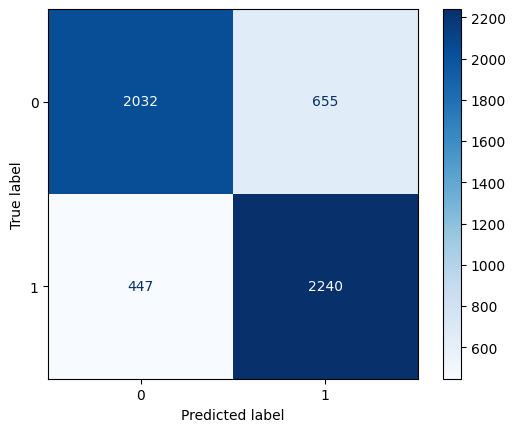

In [82]:
y_pred_probs = model.predict(X_test)  
y_pred_tf = (y_pred_probs > 0.40).astype(int).flatten() 

precision = precision_score(y_test, y_pred_tf, average=None)
recall = recall_score(y_test, y_pred_tf, average=None)
accuracy = accuracy_score(y_test, y_pred_tf)
print(f'Accuracy: {accuracy:.4f}')
print(f"Precision class 0: {precision[0]:.4f}, Precision class 1: {precision[1]:.4f}")
print(f"Recall class 0: {recall[0]:.4f}, Recall class 1: {recall[1]:.4f}")

cm = confusion_matrix(y_test, y_pred_tf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues') 
